# Generate Alphas - Mean Reversion

This is a mini project that uses the mean reversion to generate alphas. The idea of mean reversion is that asset prices eventually converge to their long-term mean. If the current price is lower than the historical mean, then it is expected to rise and hence attractive to buy. Conversely, if the current price is higher than its historical mean, then the price is expected to fall. We will use this idea to build a trading strategy.

In [2]:
import numpy as np
import pandas as pd
import os
import datetime
import glob
from sklearn.decomposition import PCA
from scipy import stats

In [3]:
def read_data(path): # read the data files in a directory
    
    files = glob.glob(path + '/*.txt')

    li = []
    stock_names = []

    for f in files: # read all the stock data
        if os.stat(f).st_size != 0: # check the if the file is empty

            temp_df = pd.read_csv(f)# read in csv

            temp_df['Date'] = pd.to_datetime(temp_df['Date'], format="%Y-%m-%d")# convert the Date type to datetime

            temp_df = temp_df.set_index(temp_df['Date'])# change the index to Date

            if (len(temp_df.index) >= 2000) & (temp_df.index[-1] == datetime.datetime(2017, 11, 10, 0, 0, 0)):
                # filter to get the most relevant and recent the data

                li.append(temp_df['Close']) # append Close column of df to list

                temp_stock_name = f[len(path)+1:-4] # get the stock's name

                stock_names.append(temp_stock_name)
    print('There are ' +str(len(stock_names))+ ' stocks in the dataframe')

    df = pd.concat(li, axis = 1) # Concatenate the stocks into the same dataframe
    df.columns = stock_names 

   
    print('The dataframe: ')
    display(df)
    
    return df

In [4]:
path = 'kaggle_huge_stock_market_dataset/Data/Stocks'
df = read_data(path)

There are 3389 stocks in the dataframe
The dataframe: 


,a.us,aa.us,aaba.us,aame.us,aan.us,aaon.us,aap.us,aapl.us,aau.us,aav.us,...,zbra.us,zeus.us,zf.us,zion.us,ziop.us,zixi.us,zn.us,znh.us,ztr.us,zumz.us
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-06,68.22,47.29,71.71,3.60,35.59,34.650,80.71,173.63,0.9600,5.75,...,115.79,18.86,12.67,46.45,4.67,4.78,2.1489,38.33,13.489,17.70
2017-11-07,68.25,46.97,72.22,3.40,34.44,34.600,79.38,174.18,0.9595,5.65,...,109.31,18.45,12.71,44.88,4.66,4.68,2.0900,38.18,13.539,17.50
2017-11-08,68.11,45.89,71.16,3.45,35.99,34.425,79.41,175.61,0.9668,5.60,...,106.61,19.91,12.76,44.55,4.72,4.68,2.1100,37.22,13.460,17.10


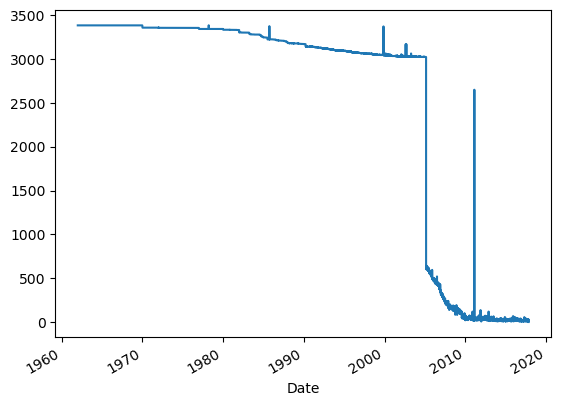

In [5]:
df.isna().sum(axis=1).plot()
df = df.loc['2010':] # NaN entries mostly appear before year 2010. From now on, we only consider the data from year 2010

In [6]:
df.to_pickle('df_mr.pkl') # pickle df for further useb

In [7]:
df = pd.read_pickle('df_mr.pkl')
df

,a.us,aa.us,aaba.us,aame.us,aan.us,aaon.us,aap.us,aapl.us,aau.us,aav.us,...,zbra.us,zeus.us,zf.us,zion.us,ziop.us,zixi.us,zn.us,znh.us,ztr.us,zumz.us
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,21.128,34.762,17.10,1.2705,18.190,5.5553,39.733,27.406,1.1000,6.83,...,28.67,32.937,6.9437,12.832,2.95,1.78,6.5000,13.681,7.3331,12.36
2010-01-05,20.899,33.680,17.23,1.3474,18.247,5.3941,39.496,27.454,1.1500,7.12,...,28.62,32.720,6.8825,13.283,3.05,1.70,6.4000,13.903,7.3331,12.29
2010-01-06,20.825,35.431,17.17,NaN,18.384,5.1802,39.841,27.017,1.2900,7.27,...,28.40,34.006,6.9236,14.439,3.08,1.70,6.2900,14.042,7.3532,12.68
2010-01-07,20.798,34.680,16.70,1.2705,18.384,5.3719,39.832,26.968,1.2400,7.11,...,27.69,33.569,6.9647,16.058,3.04,2.22,6.3200,13.963,7.3331,14.66
2010-01-08,20.791,35.533,16.70,1.3379,18.404,5.4357,39.990,27.147,1.2600,7.29,...,27.60,34.620,6.9236,15.796,3.10,2.12,6.3600,13.938,7.3898,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-06,68.220,47.290,71.71,3.6000,35.590,34.6500,80.710,173.630,0.9600,5.75,...,115.79,18.860,12.6700,46.450,4.67,4.78,2.1489,38.330,13.4890,17.70
2017-11-07,68.250,46.970,72.22,3.4000,34.440,34.6000,79.380,174.180,0.9595,5.65,...,109.31,18.450,12.7100,44.880,4.66,4.68,2.0900,38.180,13.5390,17.50
2017-11-08,68.110,45.890,71.16,3.4500,35.990,34.4250,79.410,175.610,0.9668,5.60,...,106.61,19.910,12.7600,44.550,4.72,4.68,2.1100,37.220,13.4600,17.10


The stocks we have here are random. In order to enhance the performance of our portfolio, we want to use principal component analysis (PCA) on the return rate to pick the 500 stocks that occupy the largest share of the market and compute the market composition.

In [8]:
ret_rate = df.pct_change(periods=1) #daily return rate

# find the first three principal components of the return rate matrix
model = PCA(3)
model.fit(ret_rate.fillna(0))
    
ind = np.argpartition(model.components_[0,:], -500)[-500:] 
# Among the first principal component, find the largest 500 entries/stocks

df = df.iloc[:, ind] # from now on, we only consider those 500 stocks as our universe

df

,casi.us,mndo.us,bma.us,gty.us,bncl.us,cia.us,aimc.us,rtec.us,puk_.us,cogt.us,...,smp.us,aehr.us,shlo.us,sif.us,sify.us,silc.us,abio.us,simo.us,aau.us,slm.us
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,9.13,0.49773,26.727,16.906,8.8158,6.69,11.590,7.10,18.3810,37.000,...,7.9198,1.40,4.8705,13.332,1.7139,7.7230,137.760,3.0428,1.1000,3.7822
2010-01-05,9.40,0.50320,26.592,16.614,8.7092,6.61,11.261,7.00,18.3640,36.250,...,7.8658,1.34,4.8509,13.056,1.6947,8.1346,136.080,2.9643,1.1500,3.8311
2010-01-06,9.68,0.51350,25.733,16.579,8.6292,6.48,11.334,6.90,18.3560,34.950,...,7.7942,1.45,4.4206,12.770,1.6757,8.1257,136.080,2.9732,1.2900,3.8544
2010-01-07,11.11,0.53970,25.877,16.650,8.7180,6.52,11.809,6.87,17.9380,35.400,...,7.9911,1.37,4.0881,12.662,1.6852,8.2240,138.180,2.9994,1.2400,3.9819
2010-01-08,11.88,0.56590,25.608,16.629,8.7180,6.53,11.725,7.20,18.1410,35.750,...,8.1885,1.40,4.3522,12.642,1.6662,8.2331,138.600,3.0779,1.2600,3.8151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-06,2.22,2.71000,123.290,27.760,16.3500,7.50,46.850,26.75,26.3500,4.725,...,42.4300,3.51,8.8400,7.000,1.5500,69.4200,1.200,48.1690,0.9600,10.3900
2017-11-07,2.28,2.74000,119.220,27.960,15.8000,7.47,46.000,26.45,26.3668,4.725,...,41.7100,3.40,8.9200,NaN,1.4700,69.8400,1.200,48.0600,0.9595,10.1900
2017-11-08,2.56,2.71000,124.360,28.040,15.4500,7.28,46.000,26.45,26.3296,4.500,...,41.3500,3.24,8.8300,7.150,1.4218,70.8700,1.175,47.8900,0.9668,10.0300


Next, we will compute the market return and set it as the benchmark. Later, we can evaluate the alphas by comparing them with the benchmark.

In [10]:
prin_comp = pd.Series(model.components_[0]).iloc[ind]

market_perf = prin_comp.divide(prin_comp.abs().sum())

ret_rate = df.pct_change(periods=1)

ind_names = ret_rate.columns

market_perf.index = ind_names

market_perf = ret_rate.mul(market_perf, axis=1)

market_perf = (market_perf.divide(market_perf.std())).sum(axis=1)

sharpe_ratio_market = market_perf.mean() / market_perf.std() * 16

sharpe_ratio_market # the benmark

1.0558311572526287

Now we find the alphas using mean reversion. Firstly, a naive alpha is created by the basic ideas of mean reversion. Then we improve upon it in various ways. 

In [31]:
class Mean_Reversion:
    
    def __init__(self, df):
        self.df = df
        self.ret_rate = self.df.pct_change(periods=1)
        
        
    def clean_outliers(self, alpha): # clean the outliers of alphas: drop the outliers above 99% and below 1% 
                                     # and clip the outliers between 95%-99% and 1%-5% to 95% and 5% respectively
    
        q1 = alpha.T.quantile(0.01)
        q99 = alpha.T.quantile(0.99)
        q5 = alpha.T.quantile(0.05)
        q95 = alpha.T.quantile(0.95)
    
        alpha = alpha[alpha.gt(q1, axis=0) & alpha.le(q99, axis=0)]
        alpha = alpha.clip(q5, q95, axis=0)

        return alpha
    

    def mean_reversion0(self): # generate the naive alpha by taking the sum of the negative return rate over the past 5 days

        alpha = -self.ret_rate.rolling(5).sum()
    
        alpha = alpha.replace([np.inf, -np.inf], np.nan) # replace infinities
        
        alpha = self.clean_outliers(alpha)
    
        return alpha
    
    
    def mean_reversion1(self):
    
        ret_rate = self.df.pct_change(periods=1)
        alpha = -ret_rate.rolling(5).sum() 

        alpha = alpha.replace([np.inf, -np.inf], np.nan)

        alpha = self.clean_outliers(alpha)

        alpha_mean_perday = alpha.mean(axis = 1)

        alpha = alpha.subtract(alpha_mean_perday, axis=0).divide(alpha.std(axis=1), axis=0) 
        # imporve the strategy by neutralizing the alpha i.e subtracting the mean of alpha in a day

        alpha = alpha.divide(alpha.std(axis=1), axis=0).replace([np.inf, -np.inf], np.nan)  
        # further improve the strategy by dividing the standard deviation, hence get the return per risk taken

        alpha = alpha.divide(alpha.abs().sum(axis=1), axis=0).replace([np.inf, -np.inf], np.nan) 
        # normalize the alphas by dividing the gross market value (GMV), for rescale the investment

        return alpha
    

In [32]:
class Alphas:
    
    def __init__(self, alpha, ret_rate):
        self.alpha = alpha
        self.ret_rate = ret_rate
        
    def performance(self): # calculate the everyday performances of a list of alphas
            
        perf = (self.alpha.shift(1) * self.ret_rate).sum(axis=1)
        perf = perf.divide(perf.std()) # expected return per unit volatility

        return perf
    
    def sharpe_ratio(self): # Sharpe ratio is one of the most important metrics to measure the alpha.
                            # Higher the score, better the alpha.
        
        perf = self.performance()
        return perf.mean() / perf.std() * 16
    
    def perc_profitable_days(self): # check the percentage of the days with positive returns
        
        perf = self.performance()
        profit_days = 0
        for i in range(len(perf)):
            if perf.iloc[i] > 0:
                profit_days += 1     

        return profit_days/len(self.alpha)
    
    @classmethod
    def perf_plot(cls, li): # plot all the performaces of alphas in a single figure
    
        perf_cum = []

        for alpha in li:
            perf_cum.append(alpha.performance().cumsum())

        pd.concat(perf_cum, axis=1).plot(figsize=(20, 10))
    
        return None
    
    def separate_long_short(self): # separate the long and short into two dataframes if needed
    
        row_index = self.alpha.index

        df_long = np.where(self.alpha > 0, self.alpha, np.NaN)
        df_long = pd.DataFrame(df_long)
        df_short = np.where(self.alpha < 0, self.alpha, np.NaN)
        df_short = pd.DataFrame(df_short)

        df_long.index, df_short.index = self.alpha.index, self.alpha.index

        return df_long, df_short

In [33]:
df_mr = Mean_Reversion(df)

alpha0 = Alphas(df_mr.mean_reversion0(), df_mr.ret_rate)
alpha1 = Alphas(df_mr.mean_reversion1(), df_mr.ret_rate)

In [35]:
alpha0.sharpe_ratio()

1.3988607979729797

In [36]:
alpha1.sharpe_ratio()

5.45715350908815

In [37]:
alpha0.perc_profitable_days()

0.5595959595959596

In [38]:
alpha1.perc_profitable_days()

0.6449494949494949

In [40]:
alpha1.separate_long_short()

(            0         1             2         3         4         5    \
 Date                                                                    
 2010-01-04  NaN       NaN           NaN       NaN       NaN       NaN   
 2010-01-05  NaN       NaN           NaN       NaN       NaN       NaN   
 2010-01-06  NaN       NaN           NaN       NaN       NaN       NaN   
 2010-01-07  NaN       NaN           NaN       NaN       NaN       NaN   
 2010-01-08  NaN       NaN           NaN       NaN       NaN       NaN   
 ...         ...       ...           ...       ...       ...       ...   
 2017-11-06  NaN  0.000124  1.949715e-03  0.001093  0.000996  0.000983   
 2017-11-07  NaN       NaN  2.008034e-03  0.000147  0.001514  0.000075   
 2017-11-08  NaN  0.000339           NaN       NaN  0.002283  0.001237   
 2017-11-09  NaN       NaN           NaN       NaN  0.002591  0.000476   
 2017-11-10  NaN       NaN  2.449585e-07       NaN  0.001936       NaN   
 
                  6         7       

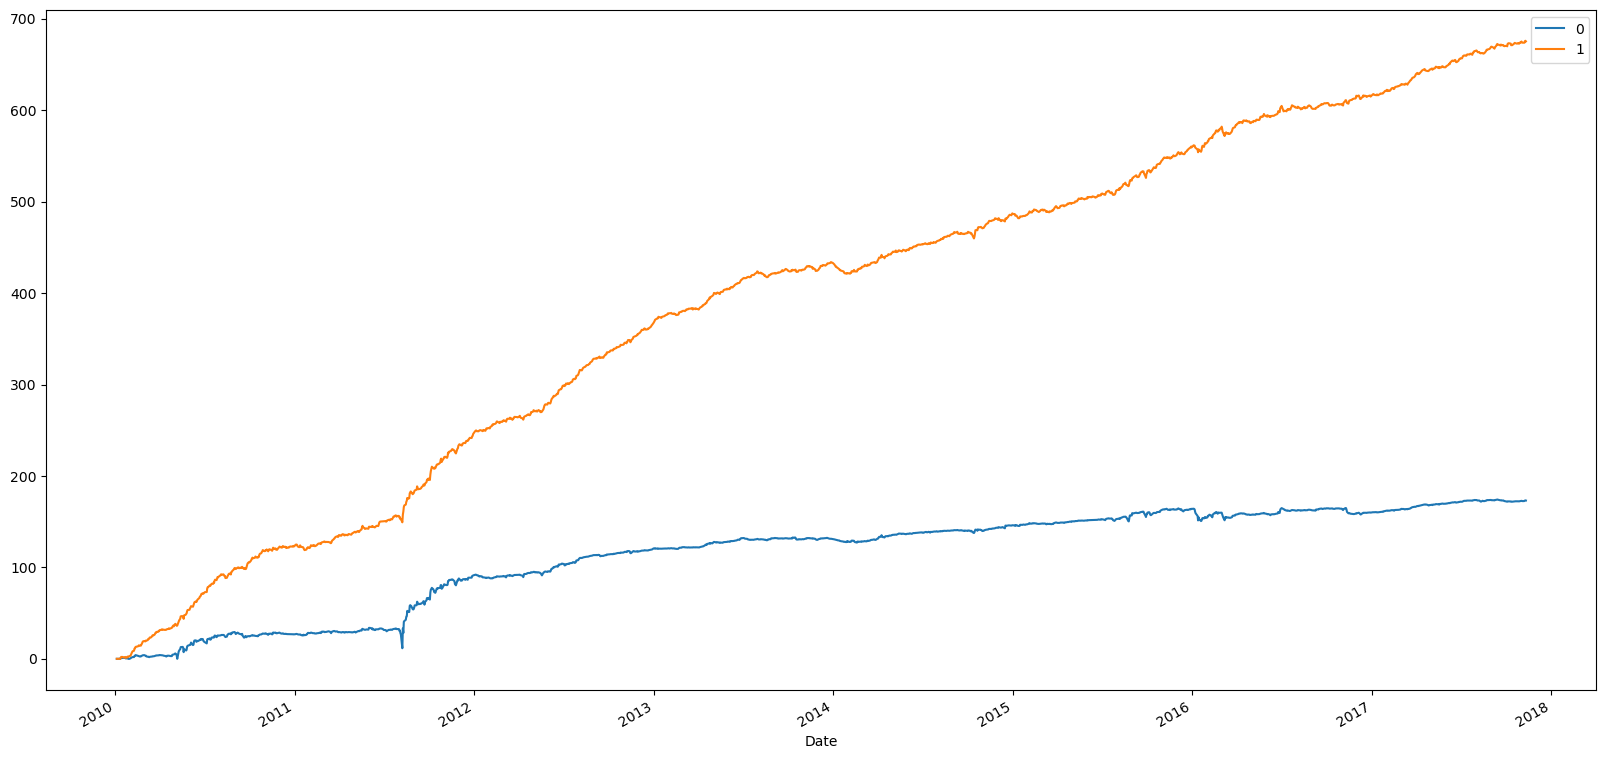

In [39]:
Alphas.perf_plot([alpha0, alpha1])

As seen in the plot, the improved alpha has a much higher cumulative return than the original alpha. Both sharpe ratios are higher than the benchmark 1.05. Especially the imporved alpha increases from 1.4 of the original alpha to 5.5. The percentage of profitable days also increases from 56% to 64%. 

#### Limitation
One of the limitations of the project is that we chose the universe based on the return rate of all time, not just in the past, which caused information leaked into the future. In reality, we may not expect the sharpe ratios to be as high as we have here.